Dataset = https://www.kaggle.com/sobhanmoosavi/us-accidents

## Part Zero - Initial Imports and Options

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
accidents_original = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\US_Accidents_Dec19.csv")
data = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\US_Accidents_Dec19.csv")

In [163]:
pd.set_option('display.max_columns', None)

## Part One - Data Cleaning

### Data wrangling - converting objects to the correct type, dropping columns where unnessecary. 

In [164]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [165]:
data['Start_Time'].dtypes

dtype('O')

In [166]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

In [167]:
data['Start_Time'].dtypes

dtype('<M8[ns]')

### Select timeframe of one year. 

In [168]:
data_year = data[(data['Start_Time'] > '2018-08-23') &
                (data['Start_Time'] <= '2019-08-23')]

### Drop columns that aren't needed for our study.

In [169]:
data_year = data_year.drop(columns = ['TMC','Number','End_Time','Wind_Chill(F)','Street','Timezone','Distance(mi)','Airport_Code','End_Lat','End_Lng','Pressure(in)','Humidity(%)'])

### Which columns have null values?

In [170]:
data_year.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
Start_Lat                     0
Start_Lng                     0
Description                   1
Side                          0
City                         12
County                        0
State                         0
Zipcode                     326
Country                       0
Weather_Timestamp         10300
Temperature(F)            15215
Visibility(mi)            17491
Wind_Direction            14237
Wind_Speed(mph)          122935
Precipitation(in)        484479
Weather_Condition         17588
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_

### Sort by Severity of Accident (4 = Most Severe, 1 = Least Severe)

In [171]:
data_year = data_year.sort_values(by = 'Severity', ascending = False)

In [172]:
data_year.head()

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Description,Side,City,County,State,Zipcode,Country,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2672087,A-2672111,Bing,4,2018-12-03 04:59:19,27.036970,-80.23304,At CR-708/Exit 96 - Accident. Blocked ahead.,R,Hobe Sound,Martin,FL,33455,US,2018-12-03 04:35:00,73.4,0.8,SSW,4.6,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2693135,A-2693159,Bing,4,2018-11-03 01:51:53,37.949130,-109.34629,Closed at US-491/US-666/Central St/Center St -...,L,Monticello,San Juan,UT,84535,US,2018-11-03 01:55:00,42.0,10.0,NW,7.0,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2693126,A-2693150,Bing,4,2018-11-03 20:23:57,29.403010,-98.55798,Ramp closed to General McMullen Dr - Road clos...,R,San Antonio,Bexar,TX,78237-4133,US,2018-11-03 20:46:00,69.8,10.0,ESE,8.1,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2724098,A-2724122,Bing,4,2018-10-28 21:09:24,32.678001,-84.98906,At GA-116/Exit 25 - Accident. Blocked ahead.,R,Fortson,Harris,GA,31808,US,2018-10-28 20:51:00,66.0,10.0,WSW,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2724096,A-2724120,Bing,4,2018-10-28 21:04:55,30.309420,-81.84368,Closed between Chaffee Rd/Exit 351 and Hammond...,R,Jacksonville,Duval,FL,32221,US,2018-10-28 20:50:00,53.6,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


### Export to CSV to reduce dataset size for easier loading with Tableau.

In [177]:
data_year.to_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\DataYearAccidents.csv")

### Count Accidents By State

In [178]:
accidents_by_state = [data_year[data_year['State'] == i].count()['ID'] 
                      for i in data_year.State.unique()]

accidents_by_state.sort(reverse = True)

In [179]:
states = data_year.State.unique()

In [180]:
state_severity = data_year[['Severity', 'ID', 'State']]
state_severity

,Severity,ID,State
2672087,4,A-2672111,FL
2693135,4,A-2693159,UT
2693126,4,A-2693150,TX
2724098,4,A-2724122,GA
2724096,4,A-2724120,FL
...,...,...,...
1113402,1,A-1113416,GA
1196172,1,A-1196186,FL
932978,1,A-932987,FL
1448081,1,A-1448097,OK


In [181]:
grouped = state_severity.groupby(['State']).sum().reset_index()
grouped.head()

,State,Severity
0,AL,44113
1,AR,2811
2,AZ,54313
3,CA,328611
4,CO,45100


In [182]:
sort_grouped = grouped.sort_values(by = 'Severity', ascending = False)
sort_grouped.head()

,State,Severity
3,CA,328611
41,TX,184091
8,FL,152824
38,SC,117868
25,NC,108884


Text(0, 0.5, '# of Accidents')

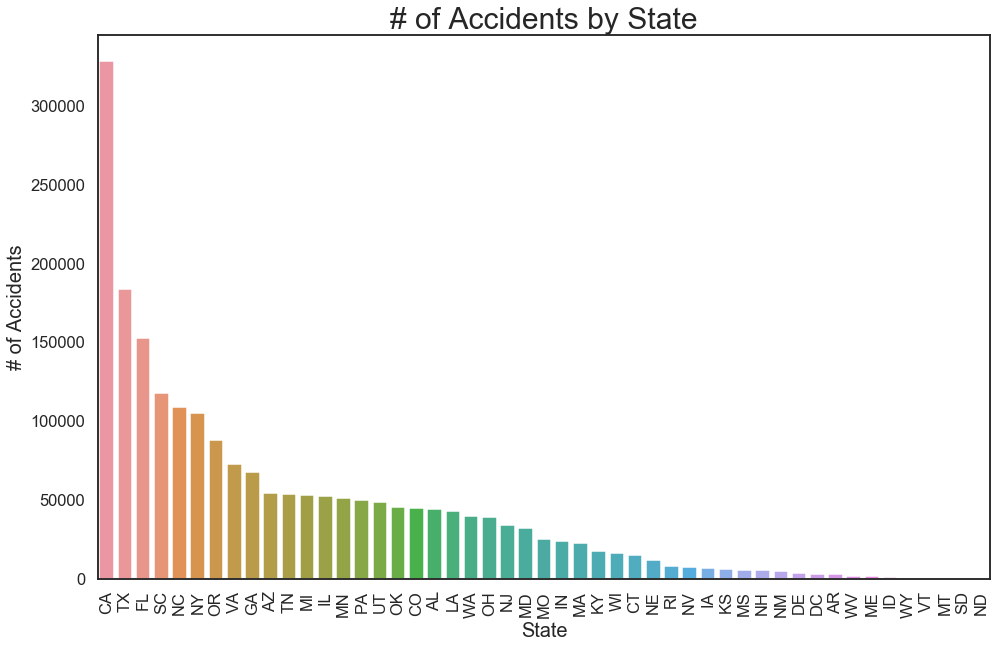

In [183]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = sort_grouped['State'], y = sort_grouped['Severity'])
plt.xticks(rotation=90)
plt.title('# of Accidents by State', fontsize = 30)
plt.xlabel('State', fontsize = 20)
plt.ylabel('# of Accidents', fontsize = 20)

### Most Common Weather Conditions during an Accident

Text(0.5, 1.0, 'Top 10 Most Common Weather Conditions at the time of an Accident')

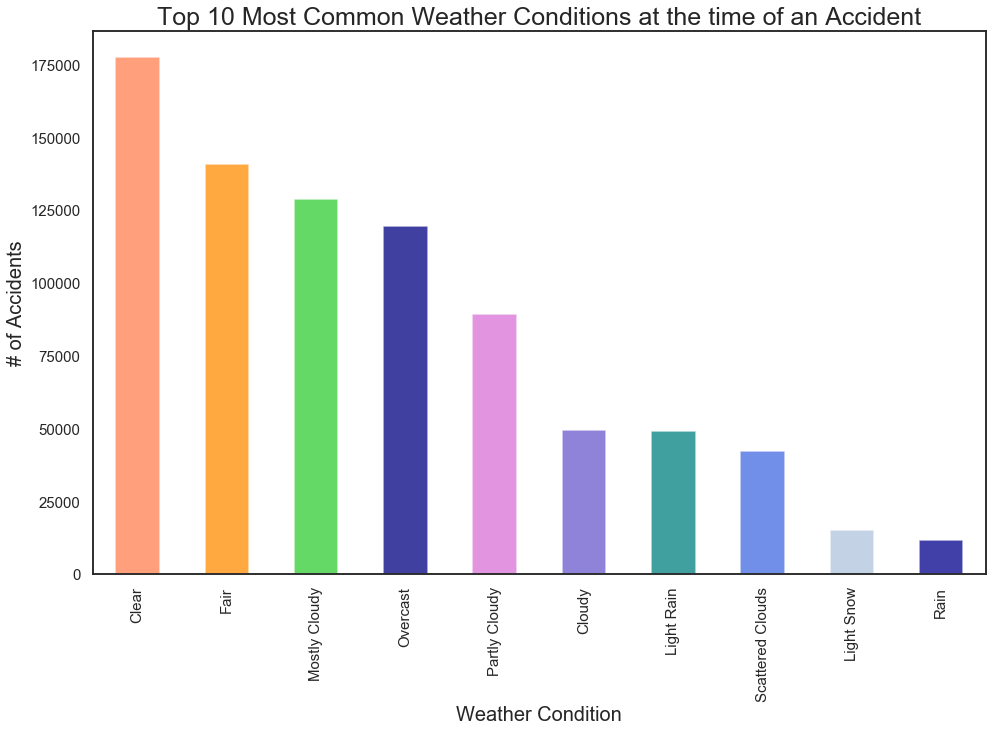

In [184]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
data_year['Weather_Condition'].value_counts().head(10).plot.bar(color = ['coral', 
                                                                         'darkorange',
                                                                         'limegreen', 
                                                                         'navy', 
                                                                         'orchid',
                                                                         'slateblue',
                                                                        'teal',
                                                                        'royalblue',
                                                                        'lightsteelblue',
                                                                        'darkblue'],
                                                               alpha = 0.75)
plt.xlabel('Weather Condition', fontsize = 20)
plt.ylabel('# of Accidents', fontsize = 20)
ax.tick_params(labelsize= 15)
plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.title('Top 10 Most Common Weather Conditions at the time of an Accident', fontsize = 25)

### Create columns to split Weather Conditions which contain ' / '

In [185]:
data_year['Weather_Condition 1'] = data_year['Weather_Condition'].str.split('/').str[0].str.strip()
data_year['Weather_Condition 2'] = data_year['Weather_Condition'].str.split('/').str[1].str.strip()
data_year['Weather_Condition 3'] = data_year['Weather_Condition'].str.split('/').str[2].str.strip()
#data_year['Weather_Condition 4'] = data_year['Weather_Condition'].str.split('and').str[3]
#data_year['Weather_Condition 5'] = data_year['Weather_Condition'].str.split('and').str[4]

data_year.head()

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Description,Side,City,County,State,Zipcode,Country,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
2672087,A-2672111,Bing,4,2018-12-03 04:59:19,27.036970,-80.23304,At CR-708/Exit 96 - Accident. Blocked ahead.,R,Hobe Sound,Martin,FL,33455,US,2018-12-03 04:35:00,73.4,0.8,SSW,4.6,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Overcast,NaN,NaN
2693135,A-2693159,Bing,4,2018-11-03 01:51:53,37.949130,-109.34629,Closed at US-491/US-666/Central St/Center St -...,L,Monticello,San Juan,UT,84535,US,2018-11-03 01:55:00,42.0,10.0,NW,7.0,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Partly Cloudy,NaN,NaN
2693126,A-2693150,Bing,4,2018-11-03 20:23:57,29.403010,-98.55798,Ramp closed to General McMullen Dr - Road clos...,R,San Antonio,Bexar,TX,78237-4133,US,2018-11-03 20:46:00,69.8,10.0,ESE,8.1,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Mostly Cloudy,NaN,NaN
2724098,A-2724122,Bing,4,2018-10-28 21:09:24,32.678001,-84.98906,At GA-116/Exit 25 - Accident. Blocked ahead.,R,Fortson,Harris,GA,31808,US,2018-10-28 20:51:00,66.0,10.0,WSW,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Clear,NaN,NaN
2724096,A-2724120,Bing,4,2018-10-28 21:04:55,30.309420,-81.84368,Closed between Chaffee Rd/Exit 351 and Hammond...,R,Jacksonville,Duval,FL,32221,US,2018-10-28 20:50:00,53.6,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Clear,NaN,NaN


#### Check to see if it's worked...

In [186]:
data_year.loc[data_year['Weather_Condition'] == 'Sand / Dust Whirlwinds / Windy']

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Description,Side,City,County,State,Zipcode,Country,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
796573,A-796582,MapQuest,2,2019-07-11 17:05:04,33.553162,-112.151573,Accident on 43rd Ave at Northern Ave.,L,Glendale,Maricopa,AZ,85302-6601,US,2019-07-11 16:58:00,111.0,10.0,WSW,22.0,0.0,Sand / Dust Whirlwinds / Windy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Sand,Dust Whirlwinds,Windy
796576,A-796585,MapQuest,2,2019-07-11 17:23:31,33.379162,-111.753967,Accident on Baseline Rd at Val Vista Dr.,R,Gilbert,Maricopa,AZ,85234,US,2019-07-11 17:50:00,109.0,10.0,WNW,24.0,0.0,Sand / Dust Whirlwinds / Windy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Sand,Dust Whirlwinds,Windy


### Splitting Weather Conditions + Severity into New DF

In [187]:
df_unmerged = data_year[['Severity',
                         'Weather_Condition 1',
                         'Weather_Condition 2',
                         'Weather_Condition 3']]

df_unmerged 

,Severity,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
2672087,4,Overcast,NaN,NaN
2693135,4,Partly Cloudy,NaN,NaN
2693126,4,Mostly Cloudy,NaN,NaN
2724098,4,Clear,NaN,NaN
2724096,4,Clear,NaN,NaN
...,...,...,...,...
1113402,1,Overcast,NaN,NaN
1196172,1,Rain,NaN,NaN
932978,1,Fair,NaN,NaN
1448081,1,Overcast,NaN,NaN


In [188]:
df_unmerged = df_unmerged.loc[df_unmerged['Weather_Condition 1'].notna()]

In [189]:
df_unmerged.shape

(874093, 4)

In [190]:
df_unmerged.isna().sum()

Severity                    0
Weather_Condition 1         0
Weather_Condition 2    868511
Weather_Condition 3    874090
dtype: int64

In [191]:
df_unmerged.drop(columns = ['Weather_Condition 2', 'Weather_Condition 3'], inplace = True)

C:\Users\Gareth\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Export to CSV as previous methods are resource intensive. 

In [193]:
df_unmerged.to_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\Dummies_Data.csv")

### Creating Dummies for Correlation

In [194]:
dummies = pd.get_dummies(df_unmerged)
dummies.head()

,Severity,Weather_Condition 1_Blowing Dust,Weather_Condition 1_Blowing Snow,Weather_Condition 1_Clear,Weather_Condition 1_Cloudy,Weather_Condition 1_Drizzle,Weather_Condition 1_Drizzle and Fog,Weather_Condition 1_Fair,Weather_Condition 1_Fog,Weather_Condition 1_Funnel Cloud,Weather_Condition 1_Hail,Weather_Condition 1_Haze,Weather_Condition 1_Heavy Blowing Snow,Weather_Condition 1_Heavy Drizzle,Weather_Condition 1_Heavy Freezing Drizzle,Weather_Condition 1_Heavy Rain,Weather_Condition 1_Heavy Rain Showers,Weather_Condition 1_Heavy Smoke,Weather_Condition 1_Heavy Snow,Weather_Condition 1_Heavy Snow with Thunder,Weather_Condition 1_Heavy T-Storm,Weather_Condition 1_Heavy Thunderstorms and Rain,Weather_Condition 1_Ice Pellets,Weather_Condition 1_Light Blowing Snow,Weather_Condition 1_Light Drizzle,Weather_Condition 1_Light Freezing Drizzle,Weather_Condition 1_Light Freezing Fog,Weather_Condition 1_Light Freezing Rain,Weather_Condition 1_Light Hail,Weather_Condition 1_Light Haze,Weather_Condition 1_Light Ice Pellets,Weather_Condition 1_Light Rain,Weather_Condition 1_Light Rain Shower,Weather_Condition 1_Light Rain Showers,Weather_Condition 1_Light Rain with Thunder,Weather_Condition 1_Light Snow,Weather_Condition 1_Light Snow Showers,Weather_Condition 1_Light Snow and Sleet,Weather_Condition 1_Light Snow with Thunder,Weather_Condition 1_Light Thunderstorms and Rain,Weather_Condition 1_Light Thunderstorms and Snow,Weather_Condition 1_Low Drifting Snow,Weather_Condition 1_Mist,Weather_Condition 1_Mostly Cloudy,Weather_Condition 1_N,Weather_Condition 1_Overcast,Weather_Condition 1_Partly Cloudy,Weather_Condition 1_Patches of Fog,Weather_Condition 1_Rain,Weather_Condition 1_Rain Shower,Weather_Condition 1_Rain Showers,Weather_Condition 1_Sand,Weather_Condition 1_Scattered Clouds,Weather_Condition 1_Shallow Fog,Weather_Condition 1_Showers in the Vicinity,Weather_Condition 1_Small Hail,Weather_Condition 1_Smoke,Weather_Condition 1_Snow,Weather_Condition 1_Snow and Sleet,Weather_Condition 1_Snow and Thunder,Weather_Condition 1_Squalls,Weather_Condition 1_T-Storm,Weather_Condition 1_Thunder,Weather_Condition 1_Thunder and Hail,Weather_Condition 1_Thunder in the Vicinity,Weather_Condition 1_Thunderstorm,Weather_Condition 1_Thunderstorms and Rain,Weather_Condition 1_Tornado,Weather_Condition 1_Widespread Dust,Weather_Condition 1_Wintry Mix
2672087,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2693135,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2693126,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2724098,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2724096,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
pd.DataFrame(dummies.sum().sort_values(ascending = False))

,0
Severity,2059512
Weather_Condition 1_Clear,177848
Weather_Condition 1_Fair,142809
Weather_Condition 1_Mostly Cloudy,130038
Weather_Condition 1_Overcast,119597
...,...
Weather_Condition 1_Hail,1
Weather_Condition 1_Thunder and Hail,1
Weather_Condition 1_Snow and Thunder,1
Weather_Condition 1_Light Hail,1


In [196]:
dummies['Severity'].corr(dummies['Weather_Condition 1_Clear'])

-0.009457552324555812

### Finding High (> 0.01 or <0.01) Correlation

In [197]:
columns = list(dummies.columns)
columns.remove('Severity')

correlation_values = []
weather_types = []

for column in columns:
    corr = dummies['Severity'].corr(dummies[column])
    if corr >= 0.01 or corr <= -0.01:
        print(f'The correlation for {column} = {corr}')
        print('------------------------------------------------------')
        weather_types.append(column)
        correlation_values.append(corr)


The correlation for Weather_Condition 1_Fair = -0.021000003869433213
------------------------------------------------------
The correlation for Weather_Condition 1_Fog = -0.011242817136335778
------------------------------------------------------
The correlation for Weather_Condition 1_Heavy Rain = 0.010389957301683864
------------------------------------------------------
The correlation for Weather_Condition 1_Light Freezing Rain = 0.012877967372987893
------------------------------------------------------
The correlation for Weather_Condition 1_Light Snow = 0.02647221114934735
------------------------------------------------------
The correlation for Weather_Condition 1_Rain = 0.011654743262629056
------------------------------------------------------


In [198]:
weather_types = [item.replace('Weather_Condition 1_','') for item in weather_types]

Text(0, 0.5, 'Correlation')

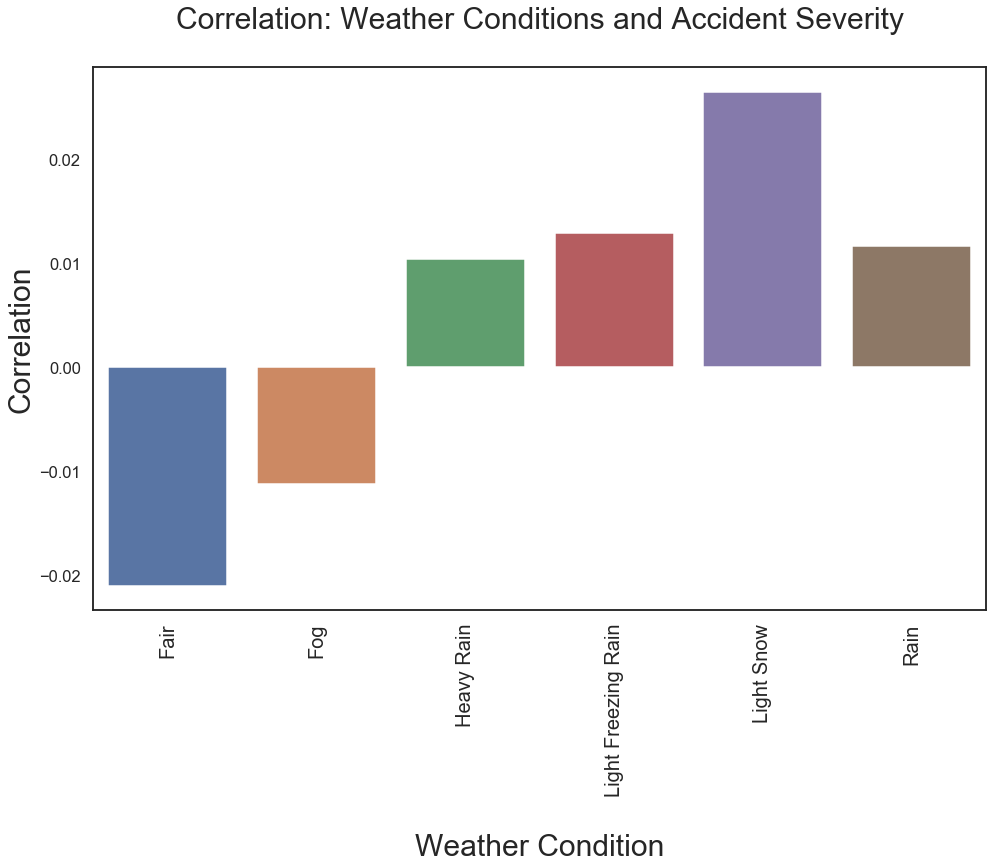

In [199]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = weather_types, y = correlation_values)
plt.xticks(rotation=90)
plt.title('Correlation: Weather Conditions and Accident Severity\n', fontsize = 30)
plt.xlabel('\nWeather Condition', fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel('Correlation', fontsize = 30)

### Visualization

In [200]:
data_year[data_year == True].count(axis = 1).sum()

332342